In [ ]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['day']=le.fit_transform(data['day'])
data['time']=le.fit_transform(data['time'])

data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [ ]:
#split the fetures and labeks separately
x = data[['total_bill']].values
y = data['tip'].values

In [ ]:
"""#split teh dataset into trainign and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)"""

'#split teh dataset into trainign and testing data\nfrom sklearn.model_selection import train_test_split\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)'

In [ ]:
#Building the Linear Model
l_reg=LinearRegression()
l_reg.fit(x,y)


LinearRegression()

In [ ]:
#Building the Polynomial Model
p_reg=PolynomialFeatures(degree=3)
poly_reg=p_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(poly_reg,y)

LinearRegression()

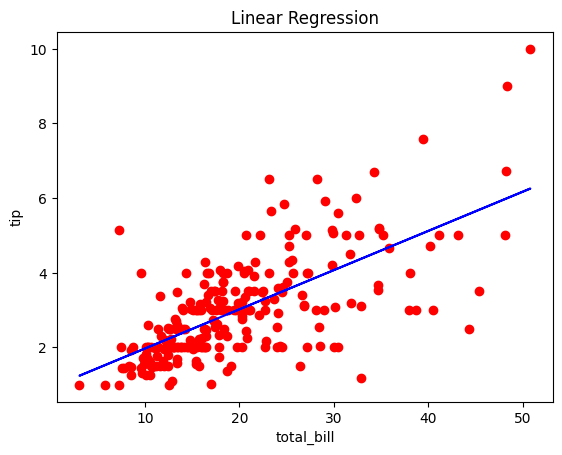

In [ ]:
#Visualization of linear regession
plt.scatter(x,y,color='red')
plt.plot(x,l_reg.predict(x),color='blue')
plt.title('Linear Regression')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

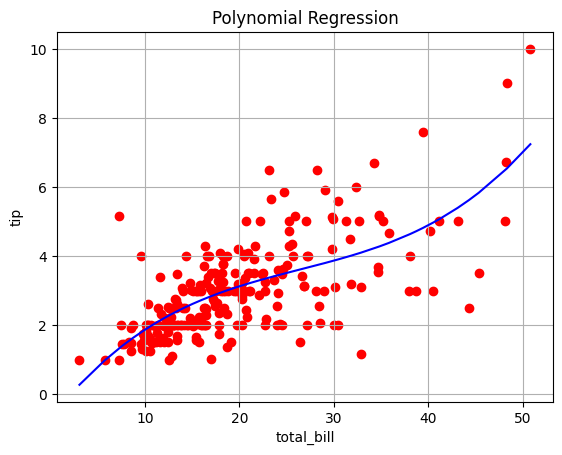

In [ ]:
#Visualization with Polynomail Regression
"""plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict.fit_transform((x)),color='blue')
plt.title('Polynomial Regression')
plt.xlabel('total_bill')
plt.ylabel('tip')"""
# Visualize the Polynomial Regression
plt.scatter(x, y, color='red')  # Original data points

# Plot the polynomial curve
x_sorted = np.sort(x, axis=0)  # Sort x for a smooth curve
x_sorted_poly = poly.transform(x_sorted)  # Transform x to polynomial features
y_pred = lin_reg_2.predict(x_sorted_poly)  # Predict using trained model

plt.plot(x_sorted, y_pred, color='blue')  # Smooth curve
plt.title('Polynomial Regression')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.grid(True)
plt.show()


In [ ]:
#predicting the result with Linear Model
l_pred=l_reg.predict([[6.5]])
print(l_pred)

[1.60292898]


In [ ]:
# predicting the result with Polynomial Model
# Need to transform the input value to polynomial features first
input_value = np.array([[6.5]])
input_value_poly = p_reg.transform(input_value)
p_pred = lin_reg_2.predict(input_value_poly)
p_pred


array([1.15427443])

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
l_score=r2_score(y,l_reg.predict(x))
l_score

0.45661658635167657

In [ ]:
# Find R-squared score for Linear Model
l_score = r2_score(y, l_reg.predict(x))
print(f"Linear Model R-squared: {l_score}")

# Find R-squared score for Polynomial Model
# Predict y values using the trained polynomial model
y_poly_pred = lin_reg_2.predict(poly_reg)
p_score = r2_score(y, y_poly_pred)
print(f"Polynomial Model R-squared: {p_score}")

# Accuracy score is not appropriate for regression models, as it is used for classification.
# We will skip calculating accuracy score here for regression models.


Linear Model R-squared: 0.45661658635167657
Polynomial Model R-squared: 0.4728729406559252


In [ ]:
# ------------------------------------------
# Improved model using multiple features
# ------------------------------------------

# Use more features for better performance
X_multi = data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']].values
y = data['tip'].values

# Polynomial transform on multiple features
poly_multi = PolynomialFeatures(degree=3)
X_poly_multi = poly_multi.fit_transform(X_multi)

# Fit polynomial regression with multiple features
multi_model = LinearRegression()
multi_model.fit(X_poly_multi, y)

# Predict and calculate R²
y_multi_pred = multi_model.predict(X_poly_multi)
multi_r2 = r2_score(y, y_multi_pred)

print(f"Polynomial Regression with multiple features R-squared: {multi_r2}")


Polynomial Regression with multiple features R-squared: 0.6935616523071659
